In [246]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D
# import time
import pickle
import random
import time
import h5py

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive


from rebergrammar_generator import *
from experimentor import Experimentor

import os
os.getcwd()

# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation'

### Param Settings (NOTE: Define `trial` carefully, for consistent saving of data later)

In [7]:
# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.05 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.2*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 2000

trial = 'trial_1'

### Experiment Initializer and Launcher

In [3]:
start = time.time()

exp = Experimentor(M=M, N=N, k=k, n_dendrites=dendrites_percell, n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, perm_th=permanence_threshold, perm_init=init_permanence, 
                   perm_decrement=perm_decrement, perm_increment=perm_increment, 
                   perm_decay=perm_decay, perm_boost=perm_boost,
                   activity_horizon=activity_horizon, activity_th=activity_threshold,
                   do_ERG=do_ERG, nof_strings=nof_strings)

In [4]:
dict_results = exp.run_experiment()

print(time.time()-start)

# 3606 secs for 1000 strings
# 19374 secs for 5000 strings
# 7845 secs for 2000 strings

6761.186242818832


In [59]:
sys.getsizeof(dict_results['results'])

711359667

#### Writing Files

In [20]:
if do_ERG:
    exp_filename = 'ERG_'+str(nof_strings)+'strings'
else:
    exp_filename = 'SRG_'+str(nof_strings)+'strings'


# USING PICKLE
# with open(result_file+'.pickle', 'wb') as f:
#     pickle.dump(dict_results['results'], f)


with open(exp_filename+'_CharsMC'+'.pickle', 'wb') as f:
    pickle.dump(dict_results['chars_to_minicols'], f)


# USING HDF5
# with h5py.File(exp_filename+'.hdf5', 'a') as f:
    
#     g1 = f.create_group(trial)
    
#     g1.create_dataset("results", data=dict_results['results'], dtype=h5py.string_dtype(encoding='utf-8'), 
#                       compression="gzip", compression_opts=5)
# #     g1.create_dataset("chars_to_minicols", data=np.array(dict_results['chars_to_minicols']),
# #                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)
#     g1.create_dataset("in_strings_onehot", data=dict_results['in_strings_onehot'], 
#                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)
#     g1.create_dataset("out_strings_onehot", data=dict_results['out_strings_onehot'], 
#                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)

# Analysis of Results

#### Loading Files

In [21]:
if do_ERG:
    exp_filename = 'ERG_'+str(nof_strings)+'strings'
else:
    exp_filename = 'SRG_'+str(nof_strings)+'strings'
    
    
# USING PICKLE
# with open(result_file+'.pickle', 'rb') as f:
#     results = pickle.load(f)

with open(exp_filename+'_CharsMC'+'.pickle', 'rb') as f:
    charsMC = pickle.load(f)


# USING HDF5
# with h5py.File(exp_filename+'.hdf5', 'r') as f:
    
#     results = f[trial+'/results'][()]
#     #charsMC = f[trial+'/chars_to_minicols'][()]
#     in_strings_onehot = f[trial+'/in_strings_onehot'][()]
#     out_strings_onehot = f[trial+'/out_strings_onehot'][()]

# results = pd.DataFrame(results)
# results.columns = ['reber_string', 'htm_states', 'htm_preds', 'htm_preds_dend', 'htm_networks']
# results.set_index('reber_string', inplace=True)

In [74]:
results = dict_results['results']
#results.set_index('reber_string', inplace=True)

In [76]:
dict_results['results']

,htm_states,htm_preds,htm_preds_dend,htm_networks
reber_string,,,,
APVPXVSZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
ATSXXVPVZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
ATXXVPVZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
ATXXVSZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
ATXXVSZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
...,...,...,...,...
ATXXVSZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
APVPXVSZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...
ATXXVPXVPVZ,"[[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[[<htm_cell.HTM_CELL object at 0x7ff4a01c03d0...


In [22]:
charsMC

,A,T,S,X,P,V,Z
0,1,11,17,3,0,2,5
1,7,20,18,4,6,9,37
2,21,28,19,12,8,10,43
3,23,29,25,13,33,14,52
4,26,35,34,16,36,15,53
5,27,49,48,22,47,24,63
6,30,66,61,39,58,38,64
7,31,72,67,44,62,41,65
8,32,84,71,45,89,42,68
9,40,87,79,51,109,50,69


In [81]:
# Generating xticks for plots based on characters-minicols

xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch
    
xticks_plot

array(['P', 'A', 'V', 'X', 'X', 'Z', 'P', 'A', 'P', 'V', 'V', 'T', 'X',
       'X', 'V', 'V', 'X', 'S', 'S', 'S', 'T', 'A', 'X', 'A', 'V', 'S',
       'A', 'A', 'T', 'T', 'A', 'A', 'A', 'P', 'S', 'T', 'P', 'Z', 'V',
       'X', 'A', 'V', 'V', 'Z', 'X', 'X', 'A', 'P', 'S', 'T', 'V', 'X',
       'Z', 'Z', 'V', 'X', 'A', 'X', 'P', 'X', 'V', 'S', 'P', 'Z', 'Z',
       'Z', 'T', 'S', 'Z', 'Z', 'X', 'S', 'T', 'V', 'X', 'Z', 'V', 'Z',
       'A', 'S', 'A', 'V', 'A', 'X', 'T', 'A', 'V', 'T', 'V', 'P', 'S',
       'X', 'Z', 'X', 'A', 'A', 'A', 'S', 'A', 'T', 'T', 'S', 'Z', 'V',
       'T', 'T', 'V', 'X', 'X', 'P', 'Z', 'P', 'S', 'P', 'T', 'A', 'P',
       'S', 'Z', 'S', 'X', 'S', 'T', 'T', 'V', 'S', 'S', 'Z', 'Z', 'P',
       'Z', 'P', 'P', 'S', 'Z', 'Z', 'P', 'P', 'Z', 'S', 'P', 'A', 'P',
       'T', 'A', 'T', 'T', 'S', 'T', 'S', 'X', 'A', 'V', 'P', 'V', 'X',
       'T', 'P', 'Z', 'P', 'S', 'T', 'A', 'Z', 'V', 'T', 'S', 'Z', 'V',
       'X', 'P', 'P', 'T', 'X', 'V'], dtype=object)

## 1. Input String Statistics

In [77]:
%matplotlib inline

A total of 2000 strings were generated. 

With: 
NOF Unique Strings = 211. 
NOF characters in total = 16851. 
NOF strings with context APVPVZ = 235. 
Mean length of string = 8.4255. 
Median length of string = 8.0.


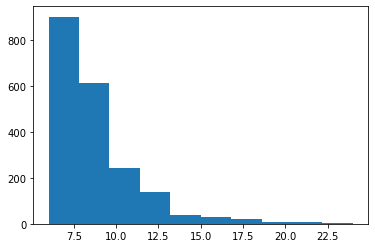

In [78]:
in_strings_alpha = [s for s in list(results.index)]

# NOF TOTAL CHARACTERS in the input stream
tot_len_in = 0
for string in in_strings_alpha:
    tot_len_in += len(string)

# NOF STRINGS with a given CONTEXT
context = 'APVPVZ'


# Plotting HISTOGRAM of REBER STRING's LENGTH
len_rg_exs = []

for ex in in_strings_alpha:
    len_rg_exs.append(len(ex))



print(f'A total of {len(in_strings_alpha)} strings were generated. \n\n\
With: \n\
NOF Unique Strings = {len(np.unique(in_strings_alpha))}. \n\
NOF characters in total = {tot_len_in}. \n\
NOF strings with context {context} = {sum([i.startswith(context) for i in in_strings_alpha])}. \n\
Mean length of string = {np.mean(len_rg_exs)}. \n\
Median length of string = {np.median(len_rg_exs)}.')

plt.figure()
plt.hist(len_rg_exs)
plt.show()

## 2. Network Activity & Predictivity

### Computing Cellular Activity & Predictivity

In [88]:
%matplotlib notebook

<IPython.core.display.Javascript object>


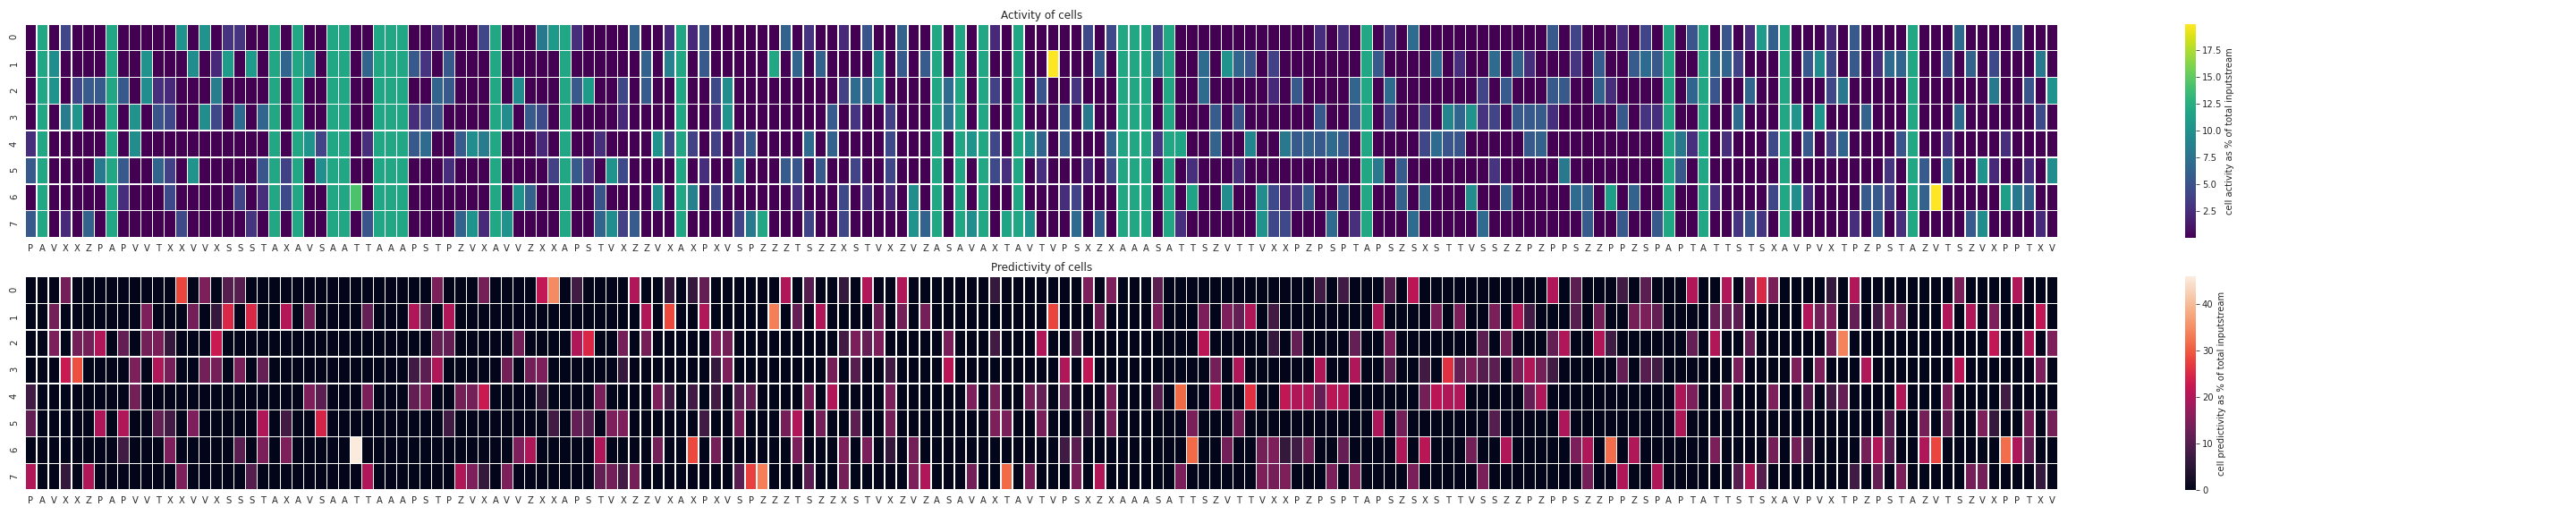

In [124]:
cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])

# Normalizing the net cellular predictivity of each cell
cell_predictivity = (cell_predictivity/tot_len_in)*100
# Normalizing the net cellular activity of each cell
cell_activity = (cell_activity/tot_len_in)*100

sns.set_style("whitegrid")
fig, axes = plt.subplots(2,1, sharex=False, figsize=(40,8))

sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot, 
            ax=axes[0], cbar_kws={'label':'cell activity as % of total inputstream'})
axes[0].set_title('Activity of cells')

sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot,
            ax=axes[1], cbar_kws={'label':'cell predictivity as % of total inputstream'})
axes[1].set_title('Predictivity of cells')

axes[0].set_xticklabels(labels=xticks_plot, rotation=0)
axes[1].set_xticklabels(labels=xticks_plot, rotation=0)
plt.tight_layout()
plt.show()

### Cell Activity & Predictivity – Character-wise

<IPython.core.display.Javascript object>


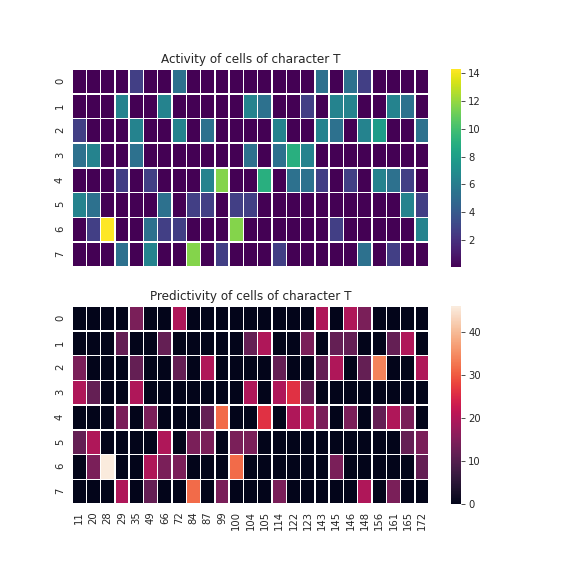

Character-wise Activity: 

 [[ 0.05340929  0.05340929  0.05340929  0.05340929  2.68233339  0.05340929
   0.05340929  5.28752003  0.05340929  0.05340929  0.05340929  0.05340929
   0.05340929  0.05340929  0.05340929  0.05340929  0.05340929  5.28752003
   0.05340929  5.28752003  2.68233339  0.05340929  0.05340929  0.05340929
   0.05340929]
 [ 0.05340929  0.05340929  0.05340929  6.43878702  0.05340929  0.05340929
   6.43878702  0.05340929  0.05340929  0.05340929  0.05340929  0.05340929
   6.43878702  5.28752003  0.05340929  0.05340929  2.68233339  0.05340929
   6.43878702  6.43878702  0.05340929  0.05340929  6.43878702  5.28752003
   0.05340929]
 [ 2.68233339  0.05340929  0.05340929  0.05340929  6.43878702  0.05340929
   0.05340929  6.43878702  0.05340929  5.28752003  0.05340929  0.05340929
   0.05340929  0.05340929  6.43878702  0.05340929  0.05340929  6.43878702
   5.28752003  0.05340929  6.43878702  7.91644413  0.05340929  0.05340929
   5.28752003]
 [ 5.28752003  6.43878702  0.05340929  

In [247]:
char = 'T'

char_activity = cell_activity[:,list(charsMC[char])]
char_predictivity = cell_predictivity[:,list(charsMC[char])]

sns.set_style("whitegrid")
fig, axes = plt.subplots(2,1, sharex=True, figsize=(8,8))

sns.heatmap(char_activity, linewidth=0.5, cmap='viridis', xticklabels=list(charsMC[char]), ax=axes[0])
axes[0].set_title(f'Activity of cells of character {char}')
sns.heatmap(char_predictivity, linewidth=0.5, xticklabels=list(charsMC[char]), ax=axes[1])
axes[1].set_title(f'Predictivity of cells of character {char}')
plt.show()

print('Character-wise Activity: \n\n', char_activity)
print('\n\nCharacter-wise Predictivity: \n\n', char_predictivity)

## 3. Network Properties for a particular Reber string

Showing Network properties for string: ATSSXVZ 




<IPython.core.display.Javascript object>


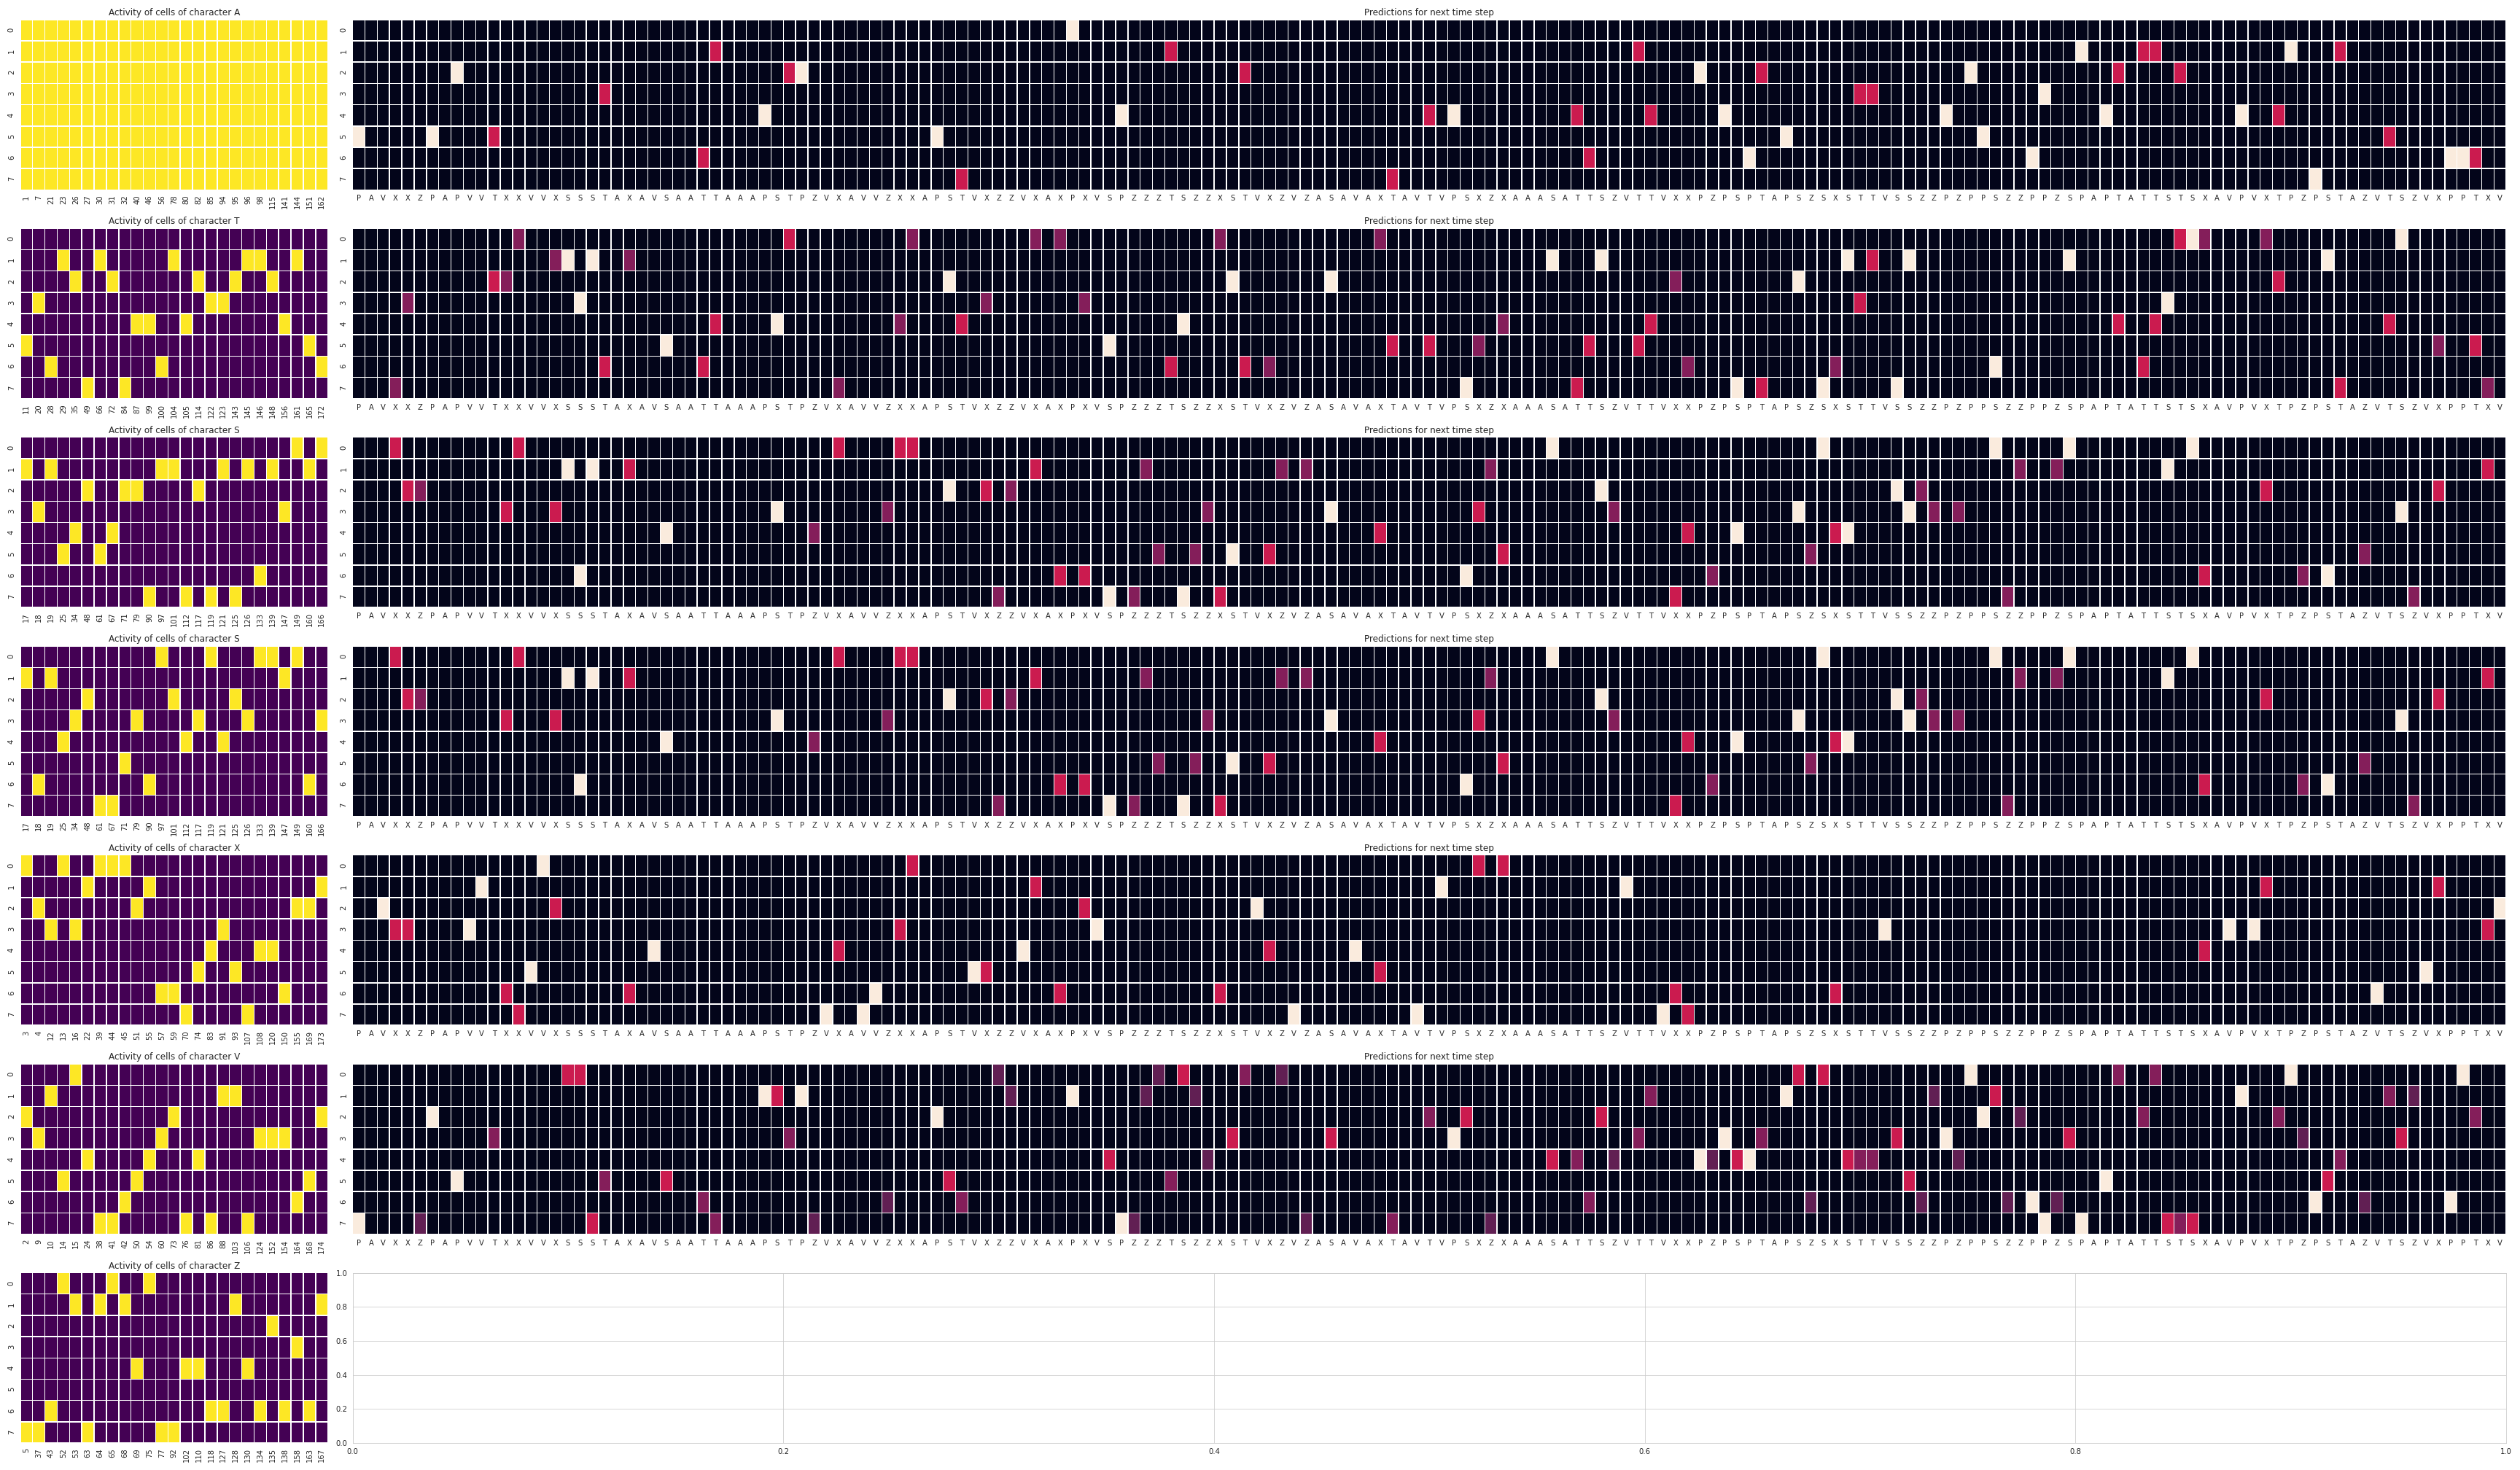

In [248]:
reber_string_idx = 999
reber_string = results.iloc[reber_string_idx].name
res_string = results.iloc[reber_string_idx]

print(f'Showing Network properties for string: {reber_string} \n\n')

sns.set_style("whitegrid")
fig, axes = plt.subplots(len(reber_string),2, figsize=(48,4*len(reber_string)), 
                         gridspec_kw={'width_ratios': [1, 7]})

for i in range(len(reber_string)):
    char = reber_string[i]
    
    # Plot the current step's character's (cell) activity
    sns.heatmap(res_string['htm_states'][i][:, list(charsMC[char])], vmax=1, vmin=0, cbar=False, linewidth=0.5, cmap='viridis', 
                xticklabels=list(charsMC[char]), ax=axes[i][0])
    axes[i][0].set_title(f'Activity of cells of character {char}')
    
    
    if i<len(reber_string)-1:
        
        # Plot the next timestep's predictions
        
        predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(res_string['htm_preds'][i])[1]])
    
        multiplying_arr = np.zeros(N)

        for k in range(len(predicted_chars)):
            multiplying_arr[list(charsMC[predicted_chars[k]])] = 1/(k+1)

        plot_predictions=[res_string['htm_preds'][i][j]*multiplying_arr
                          for j in range(M)]

        sns.heatmap(plot_predictions, vmax=1, vmin=0, cbar=False, linewidth=0.5, xticklabels=xticks_plot, ax=axes[i][1])

        axes[i][1].set_title('Predictions for next time step')
        
    else:
        continue
    

plt.show()

## 4. Measuring Performance

**Prediction Accuracy:** #correctly predicted cols / #predicted cols 
- Prediction accuracy will be 1.0 if there is only 1 column predicted by the network and that one column is one out of the (say) 50 expected predicted columns, because 1/1 = 1.0. 
- Hence, it only makes sense to compute prediction accuracy when the number of columns predicted by the network is higher than the expected number of correctly predicted columns.

**Prediction Performance:**  moving average over the last 100 sequences

### Prediction Accuracy

In [ ]:
pred_acc = []

for string_idx in range(len(in_strings_alpha)):
    
    for char_idx in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds = out_strings_onehot[string_idx][char_idx] # Correct expected predictions for the 
                                                                 # particular <[string_idx][char_idx]> timestep
        
        predicted_cols_idx = np.where(results.iloc[string_idx]['htm_preds'][char_idx])[1] # Indices of the cols
                                                                 # predicted by the network for particular 
                                                                 # <[string_idx][char_idx]> timestep.
        
        if len(predicted_cols_idx) >= np.count_nonzero(correct_preds):
            
            count=0
            for col_idx in np.where(correct_preds)[0]:
                if col_idx in predicted_cols_idx:
                    count+=1
            
            accuracy = count/len(predicted_cols_idx)
            
            pred_acc.append(accuracy)
            
        else:
            pred_acc.append(0)
        

In [ ]:
plt.figure(figsize=(50,3))
plt.plot(pred_acc[35000:])
plt.show()

print('Mean prediction accuracy: ', np.mean(pred_acc))

### Prediction Performance

## 4. Visualizing network states, predictions

# ::::::::::::::::::::::::::::::::::::::::::ROUGH:::::::::::::::::::::::::::::::::::::::::::::::::::::

<IPython.core.display.Javascript object>


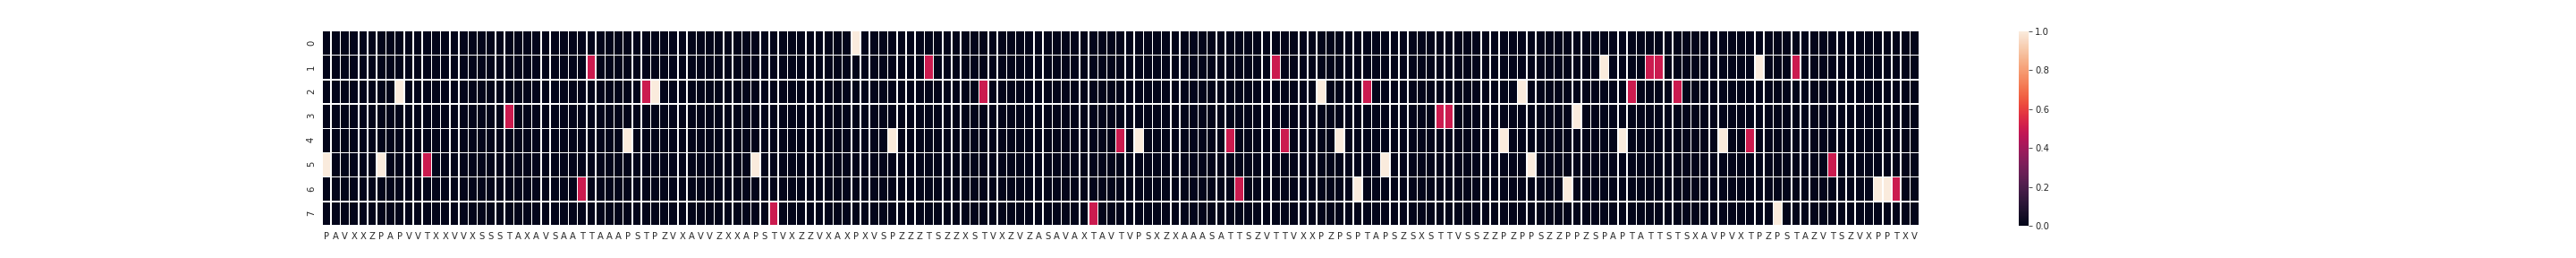

In [234]:
predicted_chars = np.unique([charsMC.columns[np.where(charsMC == idx)[1]][0] 
                  for idx in np.where(results.iloc[999]['htm_preds'][0])[1]])
    
multiplying_arr = np.zeros(N)

for i in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[i]])] = 1/(i+1)
    
plot_predictions=[results.iloc[999]['htm_preds'][0][i]*multiplying_arr
                  for i in range(M)]
    
sns.heatmap(plot_predictions,linewidth=0.5, xticklabels=xticks_plot)
plt.show()
    

In [225]:
m = np.ones(N)
m[list(charsMC['P'])] = 1/3
m[list(charsMC['T'])] = 1/2
m

array([0.33333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 1.        , 0.33333333, 1.        ,
       1.        , 0.5       , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.5       , 0.5       ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       0.5       , 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 0.5       ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.5       , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.5       , 1.        , 1.     

In [218]:
charsMC.columns[np.where(charsMC == 6)[1]][0]

'P'

### The entire calculation (step-by-step) for plotting next timestep's predictions in section 3. above

In [235]:
predicted_cols_idx = np.where(res_string['htm_preds'][i])[1]

predicted_char = []
for idx in predicted_cols_idx:
    predicted_char.append(charsMC.columns[np.where(charsMC == idx)[1]][0])

predicted_chars = np.unique(predicted_char)
multiplying_arr = np.zeros(N)

for i in range(len(predicted_chars)):
    multiplying_arr[list(charsMC[predicted_chars[i]])] = 1/(i+1)

plot_predictions=[]
for i in range(M):
    plot_predictions.append(results.iloc[999]['htm_preds'][0][i]*multiplying_arr)

plt.figure(figsize=(40,4))
sns.heatmap(plot_predictions,linewidth=0.5, xticklabels=xticks_plot)


NameError: name 'res_string' is not defined

In [ ]:
results.iloc[222]['htm_preds'][4]

In [ ]:
p = np.zeros(N)
p[np.where(results.iloc[222]['htm_preds'][4])[1]] = 1
print(p)
np.where(results.iloc[222]['htm_preds'][4])[1]

In [ ]:
np.shape(results.iloc[4999]['htm_preds'])

In [ ]:
np.where(out_strings_onehot[4999][0])[0]

In [ ]:
a = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1])
b = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1])


count=0
for col_idx in np.where(a)[0]:
    if col_idx in np.where(b)[0]:
        count+=1

accuracy = count/len(np.where(b)[0])

accuracy

In [ ]:
#np.shape(results.iloc[0]['htm_states'])

sum(results.iloc[1]['htm_states'])